In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [112]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
path = "C:\\Users\\91897\\Downloads\\data.csv"
data = pd.read_csv(path)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [66]:
data = data.drop(columns=['id', 'Unnamed: 32'])

In [67]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [68]:
data['diagnosis'].replace({'M':0 , 'B':1 },inplace=True)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [70]:
data['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [71]:
# split data into features and target values
X = data.drop('diagnosis',axis=1)
y = data['diagnosis']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [73]:
# standardizing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)


In [74]:
X_train_std[0:5]

array([[-0.01330339,  1.7757658 , -0.01491962, -0.14478895,  0.22879041,
         0.17546662, -0.54440164, -0.1282563 , -1.01205427, -0.15270564,
        -0.11809273,  0.51565734,  0.03524556, -0.2057197 ,  0.09043522,
         0.08775907, -0.39162479,  0.79264996,  0.03869712,  0.64948729,
        -0.18639977,  1.18721279, -0.19614077, -0.2913543 , -0.33218215,
        -0.17136714, -0.65932952, -0.13236958, -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, -0.76561031, -1.01982093,
        -1.24905895, -0.94455384, -0.88909098, -1.109505  , -0.18616526,
        -0.91650146, -0.45422866, -0.90363301, -0.637863  , -0.36428848,
        -1.07873087, -0.82448558, -0.92858668, -0.04989848, -0.56863123,
        -0.94999203, -0.88456941, -0.98076453, -0.80649673, -1.24062985,
        -1.22454081, -1.07819957, -1.11552632, -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816,  1.40542437, -0.75858166,
         0.75479159,  0.31955452,  0.51173688, -0

# Building Neural Network

In [75]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [76]:
# setting up layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [77]:
# compiling neural network
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [78]:
history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 24ms/step - loss: 0.9647 - accuracy: 0.4059 - val_loss: 0.7349 - val_accuracy: 0.4783
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6315 - accuracy: 0.6504 - val_loss: 0.4917 - val_accuracy: 0.7826
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 0.4328 - accuracy: 0.8289 - val_loss: 0.3531 - val_accuracy: 0.9130
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: 0.3238 - accuracy: 0.8802 - val_loss: 0.2761 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2563 - accuracy: 0.9242 - val_loss: 0.2313 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2149 - accuracy: 0.9438 - val_loss: 0.2018 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1845 - accuracy: 0.9511 - val_loss: 0.1802 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

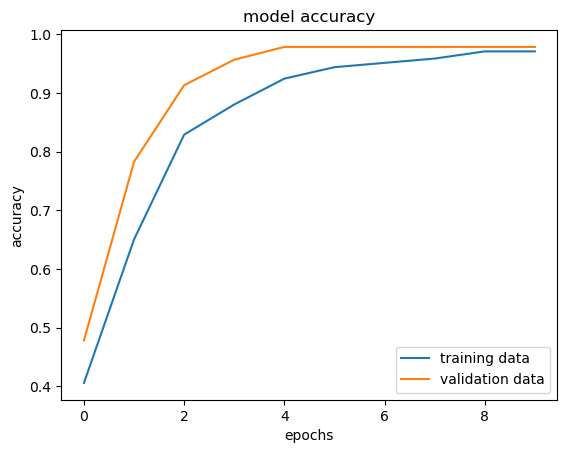

In [79]:
# visualizing the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training data','validation data'])

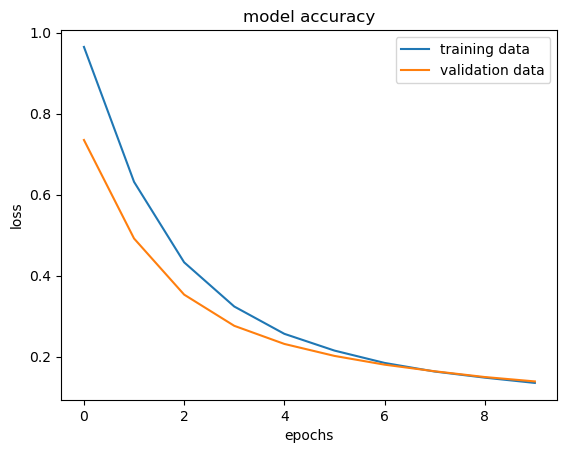

In [80]:
# visualizing the accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training data','validation data'])

In [82]:
loss, accuracy = model.evaluate(X_test_std, y_test)
accuracy

4/4 [==============================] - 0s 4ms/step - loss: 0.1645 - accuracy: 0.9474


0.9473684430122375

In [87]:
pred = model.predict(X_test_std)
pred[0]

4/4 [==============================] - 0s 3ms/step


array([0.21980853, 0.3191192 ], dtype=float32)

In [93]:
# converting prediction probability to class labels
y_pred_labels = [np.argmax(i) for i in pred]
y_pred_labels[0:5]

[1, 1, 1, 0, 1]

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_labels)

0.9473684210526315

## Building a predictive system

In [111]:
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)
input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1,-1)
input_data_std = scaler.transform(input_data_reshaped)

pred = model.predict(input_data_std)
print(pred)

pred_label = np.argmax(pred)
print(pred_label)

if pred_label == 1:
    print('Benign')
else:
    print('Malignant')

1/1 [==============================] - 0s 23ms/step
[[0.10272137 0.43928957]]
1
Benign


In [106]:
print(input_data_reshaped)

[[8.45636e+05 1.60200e+01 2.32400e+01 1.02700e+02 7.97800e+02 8.20600e-02
  6.66900e-02 3.29900e-02 3.32300e-02 1.52800e-01 5.69700e-02 3.79500e-01
  1.18700e+00 2.46600e+00 4.05100e+01 4.02900e-03 9.26900e-03 1.10100e-02
  7.59100e-03 1.46000e-02 3.04200e-03 1.91900e+01 3.38800e+01 1.23800e+02
  1.15000e+03 1.18100e-01 1.55100e-01 1.45900e-01 9.97500e-02 2.94800e-01]]
